C:\Users\dell\AppData\Local\Temp\ipykernel_1176\955435598.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[1].fillna(0, inplace=True)


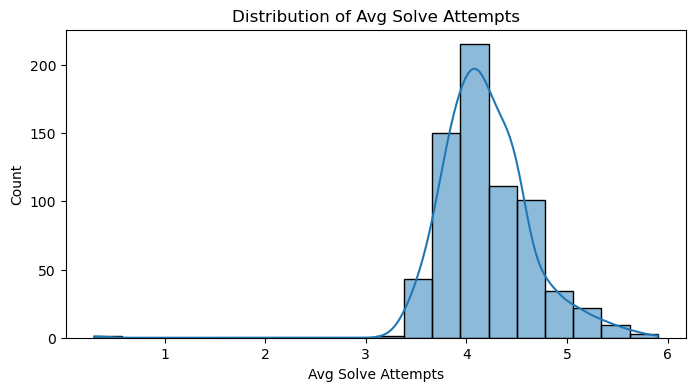

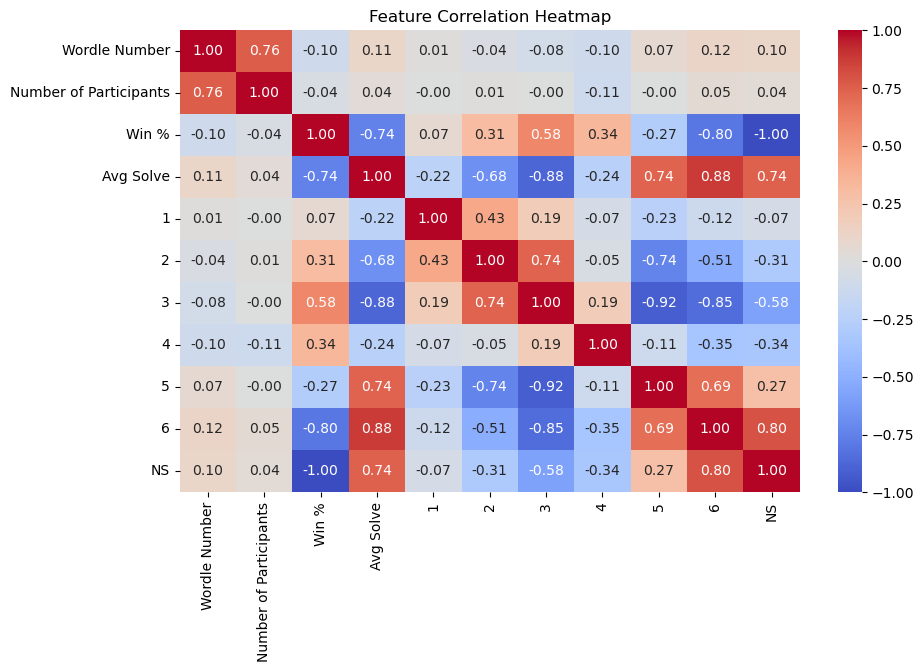

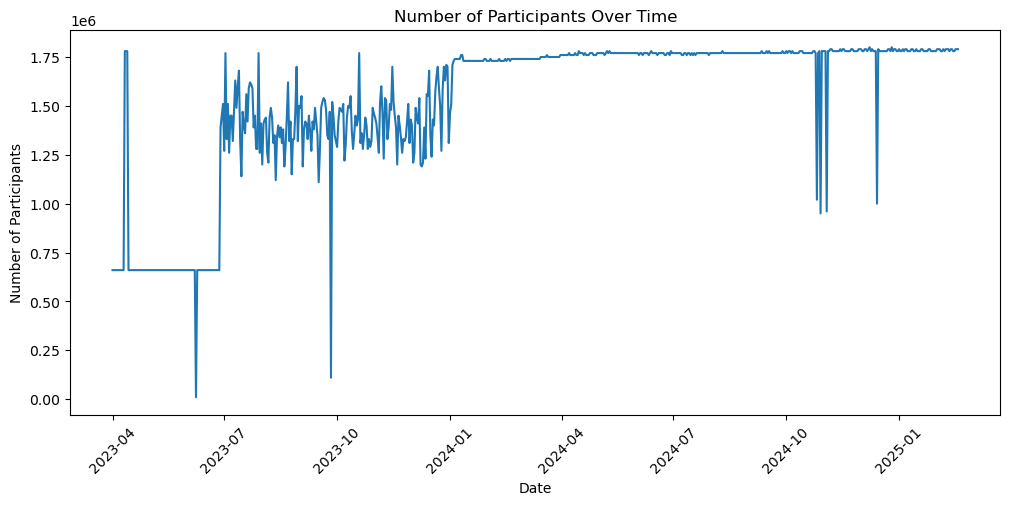

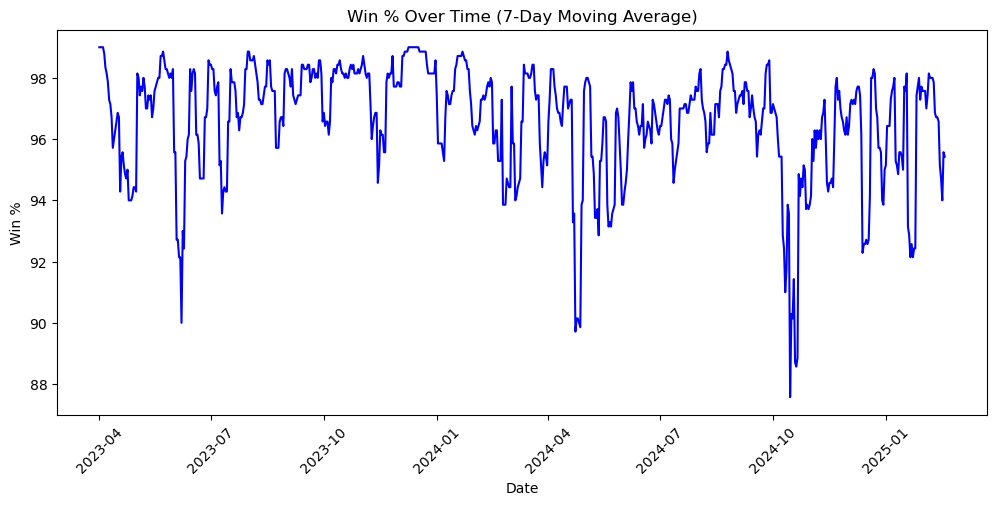

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = "C:/Users/dell/OneDrive/Desktop/STUDIES/UG3/Math Modeling/Engaging Dataset (2).xlsx"
xls = pd.ExcelFile(file_path)

# Load the data from the first sheet
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean 'Number of Participants' column (remove commas and convert to integer)
df['Number of Participants'] = df['Number of Participants'].astype(str).str.replace(',', '').str.strip()
df['Number of Participants'] = pd.to_numeric(df['Number of Participants'], errors='coerce')

# Fill missing values in column 1 with 0
df[1].fillna(0, inplace=True)

# Distribution of Avg Solve
plt.figure(figsize=(8, 4))
sns.histplot(df['Avg Solve'], bins=20, kde=True)
plt.title("Distribution of Avg Solve Attempts")
plt.xlabel("Avg Solve Attempts")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Time Series Plot: Number of Participants Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['Date'], y=df['Number of Participants'])
plt.title("Number of Participants Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.show()


# Moving Average Line Chart for Win %
df['Win %'] = df['Win %'].astype(float)  # Ensure numeric type
df = df.sort_values(by='Date')  # Sort by date

# Calculate a rolling average (e.g., 7-day)
df['Win % (7-day MA)'] = df['Win %'].rolling(window=7, min_periods=1).mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=df['Date'], y=df['Win % (7-day MA)'], color='blue')
plt.title("Win % Over Time (7-Day Moving Average)")
plt.xlabel("Date")
plt.ylabel("Win %")
plt.xticks(rotation=45)
plt.show()

